In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
fiji_quakes_data = pd.read_table('./small_datasets/wasserman/fijiquakes.dat',delim_whitespace=True)
fiji_quakes_data = fiji_quakes_data.drop('Obs.',axis=1)
fiji_quakes_data.head()

,lat,long,depth,mag,stations
0,-20.42,181.62,562,4.8,41
1,-20.62,181.03,650,4.2,15
2,-26.00,184.10,42,5.4,43
3,-17.97,181.66,626,4.1,19
4,-20.42,181.96,649,4.0,11


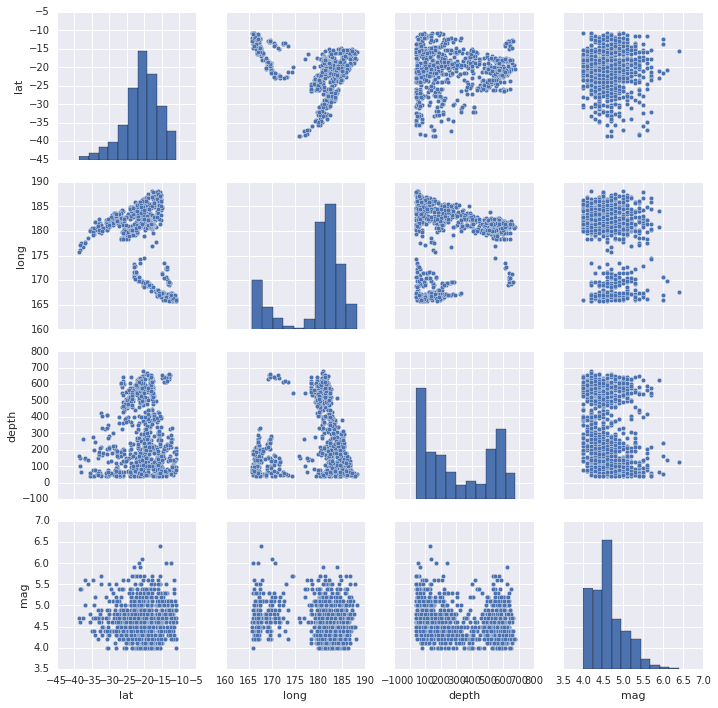

In [3]:
sns.pairplot(fiji_quakes_data,vars=['lat','long','depth','mag'])
plt.show()

In the longitude x latitude scatter plot there are two classes of earthquakes. Depth is bimodal.

## Classifying "islands"

In [4]:
from sklearn.cluster import KMeans

In [5]:
lat_long_cluster = KMeans(n_clusters = 2,n_jobs=-1)
lat_long_cluster.fit(fiji_quakes_data[['lat','long']])
island_long = np.where(lat_long_cluster.labels_,lat_long_cluster.cluster_centers_[1,1],lat_long_cluster.cluster_centers_[0,1])
island = np.where(island_long > 180,'large','small')

In [6]:
fiji_quakes_data['island'] = island
fiji_quakes_data.head()

,lat,long,depth,mag,stations,island
0,-20.42,181.62,562,4.8,41,large
1,-20.62,181.03,650,4.2,15,large
2,-26.00,184.10,42,5.4,43,large
3,-17.97,181.66,626,4.1,19,large
4,-20.42,181.96,649,4.0,11,large


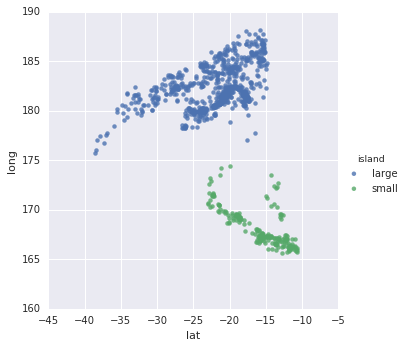

In [7]:
sns.lmplot('lat','long',data=fiji_quakes_data,hue='island',fit_reg=False)
plt.show()

In [8]:
fiji_quakes_island_large = fiji_quakes_data[fiji_quakes_data['island'] == 'large'].drop('island',axis=1)
fiji_quakes_island_small = fiji_quakes_data[fiji_quakes_data['island'] == 'small'].drop('island',axis=1)

## Classifying depth on each island

In [9]:
depth_island_large_cluster = KMeans(n_clusters = 2,n_jobs=-1)
depth_island_large_cluster.fit(fiji_quakes_island_large[['depth']])
island_large_mean_depths = np.where(depth_island_large_cluster.labels_,depth_island_large_cluster.cluster_centers_[1,0],depth_island_large_cluster.cluster_centers_[0,0])
large_island_depth_cluster = np.where(island_large_mean_depths > 300,'deep','shallow')

In [10]:
depth_island_small_cluster = KMeans(n_clusters = 2,n_jobs=-1)
depth_island_small_cluster.fit(fiji_quakes_island_small[['depth']])
island_small_mean_depths = np.where(depth_island_small_cluster.labels_,depth_island_small_cluster.cluster_centers_[1,0],depth_island_small_cluster.cluster_centers_[0,0])
small_island_depth_cluster = np.where(island_small_mean_depths > 300,'deep','shallow')

In [11]:
fiji_quakes_island_large['depth_label'] = large_island_depth_cluster
fiji_quakes_island_small['depth_label'] = small_island_depth_cluster
fiji_quakes_island_large.head()

,lat,long,depth,mag,stations,depth_label
0,-20.42,181.62,562,4.8,41,deep
1,-20.62,181.03,650,4.2,15,deep
2,-26.00,184.10,42,5.4,43,shallow
3,-17.97,181.66,626,4.1,19,deep
4,-20.42,181.96,649,4.0,11,deep


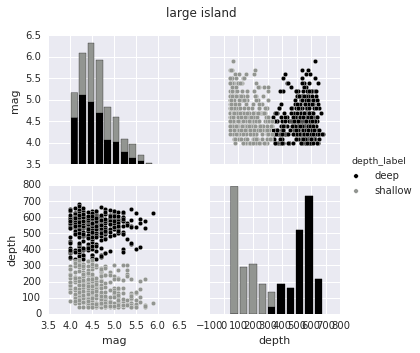

In [12]:
sns.pairplot(fiji_quakes_island_large,vars=['mag','depth'],hue = 'depth_label',palette=sns.xkcd_palette(['black','grey']))
plt.subplots_adjust(top=0.9)
plt.suptitle('large island')
plt.show()

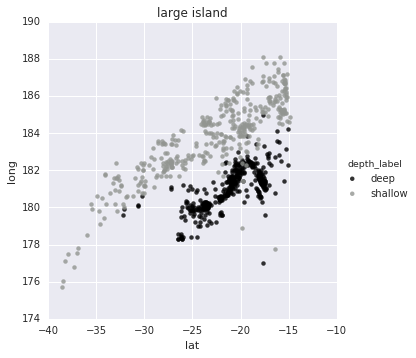

In [13]:
sns.lmplot('lat','long',data=fiji_quakes_island_large,fit_reg=False,hue='depth_label',palette=sns.xkcd_palette(['black','grey']))
plt.title('large island')
plt.show()

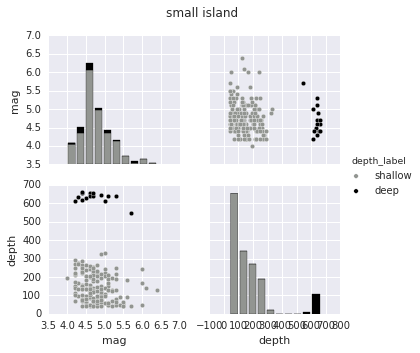

In [14]:
sns.pairplot(fiji_quakes_island_small,vars=['mag','depth'],hue='depth_label',palette=sns.xkcd_palette(['grey','black']))
plt.subplots_adjust(top=0.9)
plt.suptitle('small island')
plt.show()

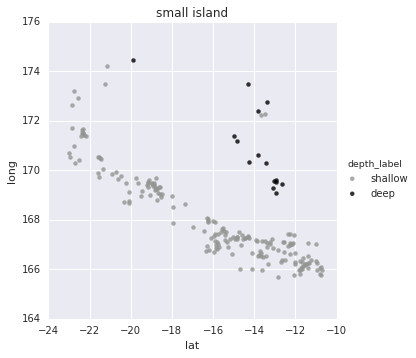

In [15]:
sns.lmplot('lat','long',data=fiji_quakes_island_small,fit_reg=False,hue='depth_label',palette=sns.xkcd_palette(['grey','black']))
plt.title('small island')
plt.show()

## TO DO: ?????